In [8]:
import matplotlib.pyplot as plt
from collections import defaultdict
import json
import os

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


baseline_mode = 'level_3'
baseline_data_path = 'sample_baseline_data'
exp_data_path = "sample_exp_data"

if not os.path.exists('figures'):
    os.makedirs('figures')

In [9]:
chiplet_array_dims = [(2,2),(2,3),(3,3),(3,4)]
structure='square'
chiplet_size=(7,7)
sparsity = None

exp_depth_data = defaultdict(list)
exp_on_chip_data = defaultdict(list)
exp_cross_chip_data = defaultdict(list)
exp_meas_num_data = defaultdict(list)  
exp_shuttle_num_data = defaultdict(list)
baseline_depth_data = defaultdict(list)
baseline_on_chip_data = defaultdict(list)
baseline_cross_chip_data = defaultdict(list) 

for dim in chiplet_array_dims:
    additional_comment = ''
    if sparsity is not None:
        additional_comment = '_sparsity{}'.format(sparsity)
    baseline_mode_comment = ''
    if baseline_mode == 'level_3':
        baseline_mode_comment = '_level_3'

    s = '_'.join([s[:3] for s in structure.split('_')])
    baseline_file_name = "{}{}{}{}{}{}{}.json".format(s, dim[0], dim[1], chiplet_size[0], chiplet_size[1], additional_comment, baseline_mode_comment)
    exp_file_name = "{}{}{}{}{}{}.json".format(s, dim[0], dim[1], chiplet_size[0], chiplet_size[1], additional_comment)
    baseline_file_path = os.path.join(baseline_data_path, baseline_file_name)
    exp_file_path = os.path.join(exp_data_path, exp_file_name)

    with open(exp_file_path, 'r') as json_file:
        print(exp_file_path)
        exp_data = json.load(json_file)
    for b, data in exp_data.items():
        exp_depth_data[b].append(data['depth'])
        exp_on_chip_data[b].append(data['on-chip'])
        exp_cross_chip_data[b].append(data['cross-chip'])
        exp_meas_num_data[b].append(data['meas_num'])


    with open(baseline_file_path, 'r') as json_file:
        baseline_data = json.load(json_file)[baseline_mode]
        print(baseline_file_path)
    for b, data in baseline_data.items():
        baseline_depth_data[b].append(data['depth'])
        baseline_on_chip_data[b].append(data['on-chip'])
        baseline_cross_chip_data[b].append(data['cross-chip'])

# Print the loaded dictionary
print("Loaded dictionary:", exp_data)
print("Loaded dictionary:", baseline_data)
print(exp_depth_data, baseline_depth_data)

sample_exp_data/squ2277.json
sample_baseline_data/squ2277_level_3.json
sample_exp_data/squ2377.json
sample_baseline_data/squ2377_level_3.json
sample_exp_data/squ3377.json
sample_baseline_data/squ3377_level_3.json
sample_exp_data/squ3477.json
sample_baseline_data/squ3477_level_3.json
Loaded dictionary: {'vqe': {'depth': 13786, 'eff_gate_num': 683377.6, 'on-chip': 532931, 'cross-chip': 8035, 'meas_num': 41358, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 479, 'sparsity': 1}, 'qft': {'depth': 15154, 'eff_gate_num': 808564.8, 'on-chip': 655120, 'cross-chip': 8227, 'meas_num': 42075, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 479, 'sparsity': 1}, 'qaoa': {'depth': 13145, 'eff_gate_num': 536762.6, 'on-chip': 386587, 'cross-chip': 7985, 'meas_num': 41403, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 478, 'sparsity': 1}, 'bv': {'depth': 34, 'eff_gate_num': 1921.1999999999998, 'on-chip': 1344, 'cross-chip': 34, 'meas_num': 148, 'weight': [7.4, 2.2], 'period

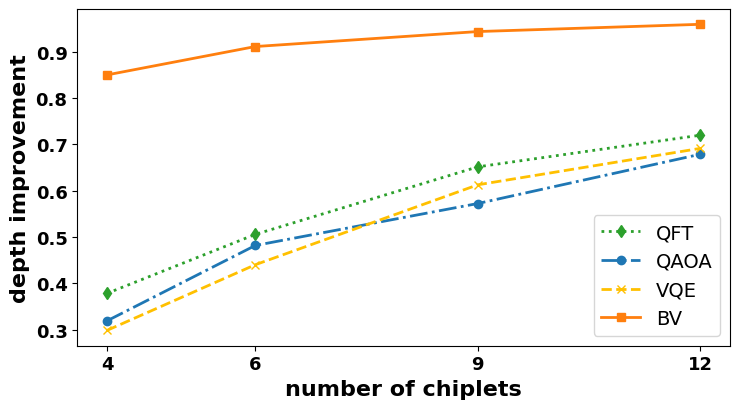

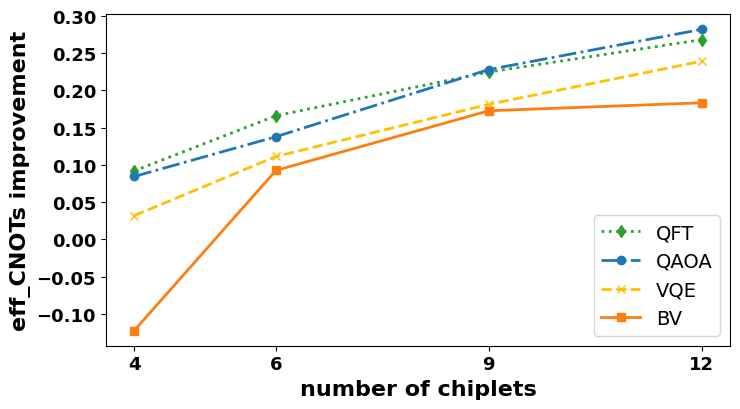

In [10]:
def draw_line_plot_for_scalability(depth_or_cnots):
    chiplet_numbers = [4,6,9,12]
    cross_chip_weight = 7.4
    meas_weight = 2.2
    draw_data = defaultdict(list)
    for b in exp_data.keys():
        for i, dim in enumerate(chiplet_array_dims):
            if depth_or_cnots == 'depth':
                exp_depth = exp_depth_data[b][i]
                baseline_depth = baseline_depth_data[b][i]
                # print(b, ': exp_depth = {}, baseline_depth = {}'.format(exp_depth, baseline_depth))
                draw_data[b].append(1 - exp_depth / baseline_depth)
            if depth_or_cnots == 'cnot':
                exp_eff_cnot = exp_on_chip_data[b][i] + cross_chip_weight * exp_cross_chip_data[b][i] + meas_weight * exp_meas_num_data[b][i]
                baseline_eff_cnot = baseline_on_chip_data[b][i] + cross_chip_weight * baseline_cross_chip_data[b][i]
                draw_data[b].append(1 - exp_eff_cnot / baseline_eff_cnot)


    if depth_or_cnots == 'depth':
        y_label = 'depth improvement'
    if depth_or_cnots == 'cnot':
        y_label = 'eff_CNOTs improvement'

    x_data = chiplet_numbers

    green, blue, red, yellow = '#2CA02C', '#1F77B4', '#FF7F0E', '#FFC000'
        
    fig, ax = plt.subplots(figsize=(7.5, 4.2))
    ax.plot(x_data, draw_data['qft'], linestyle='dotted', linewidth=2, marker='d', color=green, label='QFT')
    ax.plot(x_data, draw_data['qaoa'], linestyle='dashdot', linewidth=2, marker='o', color=blue, label='QAOA')
    ax.plot(x_data, draw_data['vqe'], linestyle='--', linewidth=2, marker='x', color=yellow, label='VQE')
    ax.plot(x_data, draw_data['bv'], linestyle='-', linewidth=2, marker='s', color=red, label='BV')

    plt.xticks(x_data, fontsize=13, fontweight='bold')
    plt.yticks(fontsize=13, fontweight='bold')
    plt.legend(fontsize=14, loc='lower right')
    ax.set_xlabel('number of chiplets', fontsize=16, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('./figures/scalability_{}.pdf'.format(depth_or_cnots))
    plt.show()

draw_line_plot_for_scalability('depth')
draw_line_plot_for_scalability('cnot')

In [11]:
structure='square'
chiplet_array_dim=(3,3)
chiplet_size=(7,7)
sparsity = None

additional_comment = ''
if sparsity is not None:
    additional_comment = '_sparsity{}'.format(sparsity)
baseline_mode_comment = ''
if baseline_mode == 'level_3':
    baseline_mode_comment = '_level_3'

s = '_'.join([s[:3] for s in structure.split('_')])
baseline_file_name = "{}{}{}{}{}{}{}.json".format(s, chiplet_array_dim[0], chiplet_array_dim[1], chiplet_size[0], chiplet_size[1], additional_comment, baseline_mode_comment)
exp_file_name = "{}{}{}{}{}{}.json".format(s, chiplet_array_dim[0], chiplet_array_dim[1], chiplet_size[0], chiplet_size[1], additional_comment)
baseline_file_path = os.path.join(baseline_data_path, baseline_file_name)
exp_file_path = os.path.join(exp_data_path, exp_file_name)

with open(exp_file_path, 'r') as json_file:
    exp_data = json.load(json_file)

exp_depth_data = dict()
exp_on_chip_data = dict()
exp_cross_chip_data = dict()
exp_meas_num_data = dict()  
exp_shuttle_num_data = dict()
for b, data in exp_data.items():
    exp_depth_data[b], exp_on_chip_data[b], exp_cross_chip_data[b], exp_meas_num_data[b], exp_shuttle_num_data[b] = data['depth'], data['on-chip'], data['cross-chip'], data['meas_num'], data['shuttle_num']

with open(baseline_file_path, 'r') as json_file:
    baseline_data = json.load(json_file)[baseline_mode]


baseline_depth_data = dict()
baseline_on_chip_data = dict()
baseline_cross_chip_data = dict() 
for b, data in baseline_data.items():
    baseline_depth_data[b], baseline_on_chip_data[b], baseline_cross_chip_data[b] = data['depth'], data['on-chip'], data['cross-chip']

# Print the loaded dictionary
print("Loaded dictionary:", exp_data)
print("Loaded dictionary:", baseline_data)

Loaded dictionary: {'vqe': {'depth': 10181, 'eff_gate_num': 385647.0, 'on-chip': 301636, 'cross-chip': 4317, 'meas_num': 23666, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 359, 'sparsity': 1}, 'qft': {'depth': 11189, 'eff_gate_num': 451553.2, 'on-chip': 368583, 'cross-chip': 4215, 'meas_num': 23536, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 359, 'sparsity': 1}, 'qaoa': {'depth': 9735, 'eff_gate_num': 300847.2, 'on-chip': 217028, 'cross-chip': 4289, 'meas_num': 23673, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 357, 'sparsity': 1}, 'bv': {'depth': 34, 'eff_gate_num': 1415.1999999999998, 'on-chip': 989, 'cross-chip': 24, 'meas_num': 113, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 1, 'sparsity': 1}}
Loaded dictionary: {'vqe': {'depth': 26277.0, 'eff_gate_num': 471148.24000000005, 'on-chip': 236970.8, 'cross-chip': 31645.6, 'cross_chip_gate_weight': 7.4, 'sparisity': None, 'qubit_num': 360, 'iterations': 5, 'mode': 'level_3'}, 'qft': {

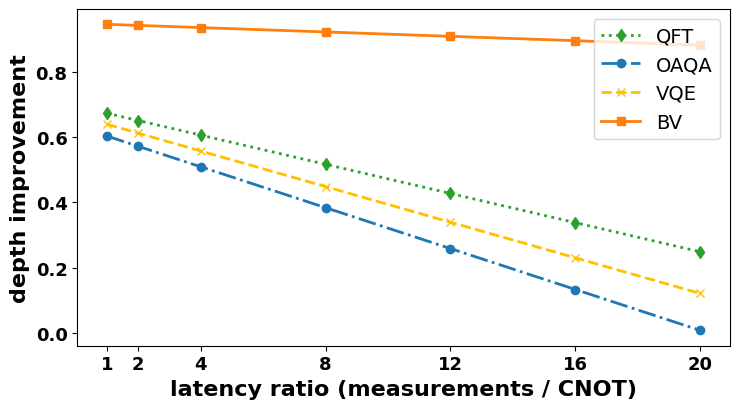

In [12]:
cross_chip_weight = 7.4
meas_weight = 2.2
meas_latencies = [1,2,4,8,12,16,20]
draw_data = defaultdict(list)
for b in exp_data.keys():
    for meas_d in meas_latencies:
        exp_depth = exp_depth_data[b] + exp_shuttle_num_data[b] * (meas_d - 2) * 2
        baseline_depth = baseline_depth_data[b]
        draw_data[b].append(1 - exp_depth/baseline_depth)

n_groups = 5
x_data = meas_latencies
y_label = 'depth improvement'

green, blue, red, yellow = '#2CA02C', '#1F77B4', '#FF7F0E', '#FFC000'
    
fig, ax = plt.subplots(figsize=(7.5, 4.2))
ax.plot(x_data, draw_data['qft'], linestyle='dotted', linewidth=2, marker='d', color=green, label='QFT')
ax.plot(x_data, draw_data['qaoa'], linestyle='dashdot', linewidth=2, marker='o', color=blue, label='OAQA')
ax.plot(x_data, draw_data['vqe'], linestyle='--', linewidth=2, marker='x', color=yellow, label='VQE')
ax.plot(x_data, draw_data['bv'], linestyle='-', linewidth=2, marker='s', color=red, label='BV')

plt.xticks(x_data, fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.legend(fontsize=14, loc='upper right')
ax.set_xlabel('latency ratio (measurements / CNOT)', fontsize=16, fontweight='bold')
ax.set_ylabel(y_label, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('./figures/sensitivity_a.pdf')
plt.show()

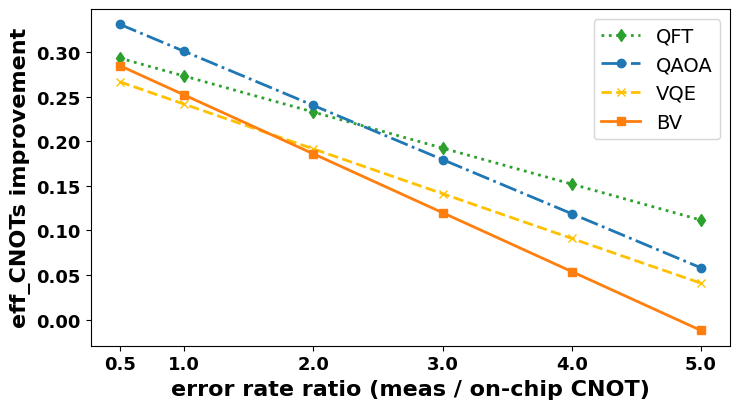

In [13]:
cross_chip_weight = 7.4
meas_weights = [0.5,1,2,3,4,5]
draw_data = defaultdict(list)
for b in exp_data.keys():
    for meas_w in meas_weights:
        exp_eff_cnot = exp_on_chip_data[b] + cross_chip_weight * exp_cross_chip_data[b] + meas_w * exp_meas_num_data[b]
        baseline_eff_cnot = baseline_on_chip_data[b] + cross_chip_weight * baseline_cross_chip_data[b]
        draw_data[b].append(1 - exp_eff_cnot / baseline_eff_cnot)

n_groups = 5
x_data = meas_weights
y_label = 'eff_CNOTs improvement'

green, blue, red, yellow = '#2CA02C', '#1F77B4', '#FF7F0E', '#FFC000'
    
fig, ax = plt.subplots(figsize=(7.5, 4.2))
ax.plot(x_data, draw_data['qft'], linestyle='dotted', linewidth=2, marker='d', color=green, label='QFT')
ax.plot(x_data, draw_data['qaoa'], linestyle='dashdot', linewidth=2, marker='o', color=blue, label='QAOA')
ax.plot(x_data, draw_data['vqe'], linestyle='--', linewidth=2, marker='x', color=yellow, label='VQE')
ax.plot(x_data, draw_data['bv'], linestyle='-', linewidth=2, marker='s', color=red, label='BV')

plt.xticks(x_data, fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.legend(fontsize=14, loc='upper right')
ax.set_xlabel('error rate ratio (meas / on-chip CNOT)', fontsize=16, fontweight='bold')
ax.set_ylabel(y_label, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('./figures/sensitivity_b.pdf')
plt.show()

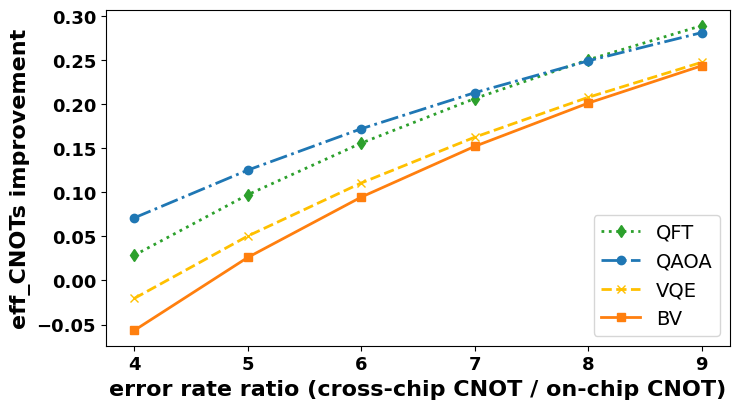

In [14]:
cross_chip_weights = [4,5,6,7,8,9]
meas_weight = 2.2
draw_data = defaultdict(list)
for b in exp_data.keys():
    for cross_w in cross_chip_weights:
        exp_eff_cnot = exp_on_chip_data[b] + cross_w * exp_cross_chip_data[b] + meas_weight * exp_meas_num_data[b]
        baseline_eff_cnot = baseline_on_chip_data[b] + cross_w * baseline_cross_chip_data[b]
        draw_data[b].append(1 - exp_eff_cnot / baseline_eff_cnot)

n_groups = 5
x_data = cross_chip_weights
y_label = 'eff_CNOTs improvement'

green, blue, red, yellow = '#2CA02C', '#1F77B4', '#FF7F0E', '#FFC000'
    
fig, ax = plt.subplots(figsize=(7.5, 4.2))
ax.plot(x_data, draw_data['qft'], linestyle='dotted', linewidth=2, marker='d', color=green, label='QFT')
ax.plot(x_data, draw_data['qaoa'], linestyle='dashdot', linewidth=2, marker='o', color=blue, label='QAOA')
ax.plot(x_data, draw_data['vqe'], linestyle='--', linewidth=2, marker='x', color=yellow, label='VQE')
ax.plot(x_data, draw_data['bv'], linestyle='-', linewidth=2, marker='s', color=red, label='BV')

plt.xticks(x_data, fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.legend(fontsize=14, loc='lower right')
ax.set_xlabel('error rate ratio (cross-chip CNOT / on-chip CNOT)', fontsize=16, fontweight='bold')
ax.set_ylabel(y_label, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('./figures/sensitivity_c.pdf')
plt.show()